# Situación Problema - CNN
## Análisis de imágenes de artículos de vestir con aprendizaje profundo

Ángel Azahel Ramírez Cabello - A01383328

Annette Pamela Ruiz Abreu - A01423595

Franco Mendoza Muraira - A01383399


Tecnológico de Monterrey, Campus Monterrey

TC2035.101 - Diseño de redes neuronales y aprendizaje profundo (Gpo 101)

Dr. Santiago Enrique Conant Pablos

09 de septiembre de 2023



## Librerías

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, optimizers, models
import keras
import time
import sklearn.model_selection as model_selection  
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-09-02 20:00:02.874856: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Cargar Datos

In [81]:
# Load the Fashion MNIST dataset
(train_images_o, train_labels_o), (test_images_o, test_labels_o) = fashion_mnist.load_data()

## Exploración de Datos

In [83]:
# Datos de entrenamiento
print("Tipo de dato:", type(train_images_o))
print("Forma:", train_images_o.shape)
print("Etiquetas:", np.unique(train_labels_o))
print("Valor mínimo:", train_images_o.min())
print("Valor máximo:", train_images_o.max())



Tipo de dato: <class 'numpy.ndarray'>
Forma: (60000, 28, 28)
Etiquetas: [0 1 2 3 4 5 6 7 8 9]
Valor mínimo: 0
Valor máximo: 255


In [84]:
# Datos de prueba
print("Tipo de dato:", type(test_images_o))
print("Forma:", test_images_o.shape)
print("Etiquetas:", np.unique(test_labels_o))
print("Valor mínimo:", test_images_o.min())
print("Valor máximo:", test_images_o.max())


Tipo de dato: <class 'numpy.ndarray'>
Forma: (10000, 28, 28)
Etiquetas: [0 1 2 3 4 5 6 7 8 9]
Valor mínimo: 0
Valor máximo: 255


## Preparación de Datos

In [85]:
# Dividimos los valores entre 255 para obtener valores entre 0 y 1

train_images = train_images_o / 255
test_images = test_images_o / 255

# Verificamos que la forma siga siendo igual
assert(train_images.shape == train_images_o.shape)
assert(test_images.shape == test_images_o.shape)



In [86]:
# Convertimos las etiquetas de clases en vectores categóricos
# Si la cateogoría ers 5, el vector resultante es: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

num_classes = len(np.unique(train_labels_o))

train_labels = keras.utils.to_categorical(train_labels_o, num_classes)
test_labels = keras.utils.to_categorical(test_labels_o, num_classes)


# Verificamos que la longitud de los vectores sea igual al número de clases
assert(len(train_labels[0])==num_classes)
assert(len(test_labels[0])==num_classes)



In [87]:
# Convertimos los datos en arreglos tridimensionales (especificando 1 porque está en escala de grises)

train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

input_shape = train_images.shape[1:]


## Construcción del modelo 1

In [88]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='tanh'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dropout_3 (Dropout)         (None, 2304)             

## Entrenamiento Modelo 1

In [89]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 68s 156ms/step - loss: 0.6196 - accuracy: 0.7762 - val_loss: 0.4041 - val_accuracy: 0.8530
Epoch 2/15
422/422 [==============================] - 88s 207ms/step - loss: 0.4179 - accuracy: 0.8516 - val_loss: 0.3602 - val_accuracy: 0.8688
Epoch 3/15
422/422 [==============================] - 78s 184ms/step - loss: 0.3803 - accuracy: 0.8644 - val_loss: 0.3297 - val_accuracy: 0.8802
Epoch 4/15
422/422 [==============================] - 69s 165ms/step - loss: 0.3516 - accuracy: 0.8744 - val_loss: 0.3152 - val_accuracy: 0.8823
Epoch 5/15
422/422 [==============================] - 63s 150ms/step - loss: 0.3354 - accuracy: 0.8806 - val_loss: 0.3005 - val_accuracy: 0.8893
Epoch 6/15
422/422 [==============================] - 72s 170ms/step - loss: 0.3169 - accuracy: 0.8871 - val_loss: 0.2812 - val_accuracy: 0.8980
Epoch 7/15
422/422 [==============================] - 76s 181ms/step - loss: 0.3055 - accuracy: 0.8910 - val_loss: 0.2736 - val_ac

## Evaluación Modelo 1

In [91]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2516612410545349
Test accuracy: 0.911300003528595


## Pruebas con otros modelos

### Modelo 2

In [129]:
n_epochs = 15
n_batch = 80
lrate = 0.0000001 

In [140]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='tanh'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), padding="valid", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), padding="valid", activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_14 (Flatten)        (None, 2048)            

In [141]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 46s 106ms/step - loss: 0.5688 - accuracy: 0.7916 - val_loss: 0.3606 - val_accuracy: 0.8642
Epoch 2/15
422/422 [==============================] - 53s 126ms/step - loss: 0.3687 - accuracy: 0.8644 - val_loss: 0.3042 - val_accuracy: 0.8863
Epoch 3/15
422/422 [==============================] - 55s 130ms/step - loss: 0.3217 - accuracy: 0.8824 - val_loss: 0.2824 - val_accuracy: 0.8950
Epoch 4/15
422/422 [==============================] - 57s 136ms/step - loss: 0.2920 - accuracy: 0.8923 - val_loss: 0.2599 - val_accuracy: 0.9045
Epoch 5/15
422/422 [==============================] - 53s 127ms/step - loss: 0.2732 - accuracy: 0.8988 - val_loss: 0.2552 - val_accuracy: 0.9035
Epoch 6/15
422/422 [==============================] - 59s 140ms/step - loss: 0.2528 - accuracy: 0.9079 - val_loss: 0.2551 - val_accuracy: 0.9058
Epoch 7/15
422/422 [==============================] - 62s 148ms/step - loss: 0.2376 - accuracy: 0.9106 - val_loss: 0.2300 - val_ac

In [142]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.22983771562576294
Test accuracy: 0.9192000031471252


### Modelo 3

In [143]:
n_epochs = 15
n_batch = 120

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='tanh'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), padding="valid", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), padding="valid", activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_15 (Flatten)        (None, 2048)            

In [144]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 44s 114ms/step - loss: 0.5899 - accuracy: 0.7807 - val_loss: 0.3712 - val_accuracy: 0.8632
Epoch 2/15
375/375 [==============================] - 48s 129ms/step - loss: 0.3681 - accuracy: 0.8652 - val_loss: 0.3110 - val_accuracy: 0.8876
Epoch 3/15
375/375 [==============================] - 45s 120ms/step - loss: 0.3222 - accuracy: 0.8829 - val_loss: 0.2829 - val_accuracy: 0.8955
Epoch 4/15
375/375 [==============================] - 40s 107ms/step - loss: 0.2922 - accuracy: 0.8927 - val_loss: 0.2640 - val_accuracy: 0.9015
Epoch 5/15
375/375 [==============================] - 44s 117ms/step - loss: 0.2683 - accuracy: 0.9002 - val_loss: 0.2513 - val_accuracy: 0.9057
Epoch 6/15
375/375 [==============================] - 49s 130ms/step - loss: 0.2507 - accuracy: 0.9066 - val_loss: 0.2428 - val_accuracy: 0.9087
Epoch 7/15
375/375 [==============================] - 50s 133ms/step - loss: 0.2393 - accuracy: 0.9121 - val_loss: 0.2326 - val_ac

In [145]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.22637632489204407
Test accuracy: 0.9214000105857849


### Modelo 4

In [199]:
n_epochs = 15
n_batch = 120

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='tanh'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), padding="valid", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), padding="valid", activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_118 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_103 (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_119 (Conv2D)         (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_104 (MaxPooli  (None, 6, 6, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_120 (Conv2D)         (None, 4, 4, 128)         73856     
                                                                 
 flatten_38 (Flatten)        (None, 2048)            

In [200]:
model.compile(loss="categorical_crossentropy", optimizer="RMSProp", metrics=["accuracy"])

model.fit(train_images, train_labels, batch_size=n_batch, epochs=n_epochs, validation_split=0.1)

Epoch 1/100
450/450 [==============================] - 48s 104ms/step - loss: 0.5776 - accuracy: 0.7897 - val_loss: 0.3517 - val_accuracy: 0.8708
Epoch 2/100
450/450 [==============================] - 48s 106ms/step - loss: 0.3613 - accuracy: 0.8683 - val_loss: 0.3085 - val_accuracy: 0.8865
Epoch 3/100
450/450 [==============================] - 46s 103ms/step - loss: 0.3109 - accuracy: 0.8863 - val_loss: 0.2787 - val_accuracy: 0.8967
Epoch 4/100
450/450 [==============================] - 44s 98ms/step - loss: 0.2823 - accuracy: 0.8977 - val_loss: 0.2576 - val_accuracy: 0.9045
Epoch 5/100
450/450 [==============================] - 41s 92ms/step - loss: 0.2608 - accuracy: 0.9054 - val_loss: 0.2464 - val_accuracy: 0.9137
Epoch 6/100
450/450 [==============================] - 53s 118ms/step - loss: 0.2440 - accuracy: 0.9107 - val_loss: 0.2444 - val_accuracy: 0.9070
Epoch 7/100
450/450 [==============================] - 41s 92ms/step - loss: 0.2327 - accuracy: 0.9144 - val_loss: 0.2303 - va

In [201]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.46621474623680115
Test accuracy: 0.9217000007629395


### Modelo 5

In [22]:
((trainX, trainY), (validationX, validationY)) = fashion_mnist.load_data()

trainX = np.expand_dims(trainX, -1)
validationX = np.expand_dims(validationX, -1)


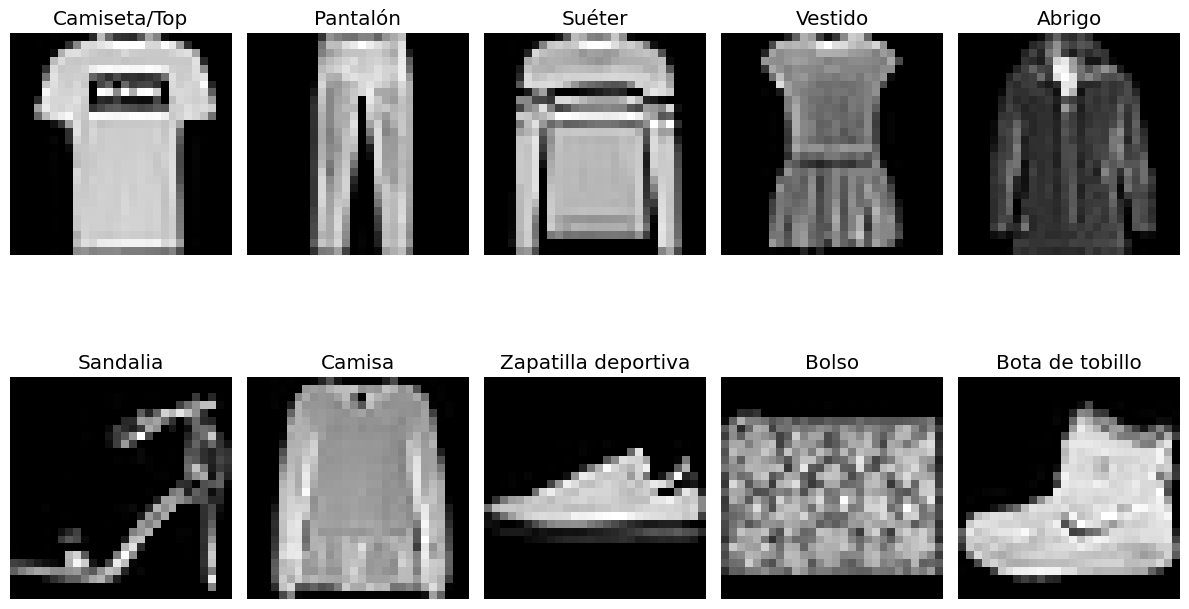

In [23]:
# Definir los nombres de las clases correspondientes a las etiquetas
nombres_clases = [
    "Camiseta/Top",
    "Pantalón",
    "Suéter",
    "Vestido",
    "Abrigo",
    "Sandalia",
    "Camisa",
    "Zapatilla deportiva",
    "Bolso",
    "Bota de tobillo"
]

# Crear un diccionario para almacenar una imagen representativa de cada etiqueta
imagenes_por_etiqueta = {}

# Recorrer el conjunto de entrenamiento y almacenar la primera imagen de cada etiqueta
for i in range(len(trainY)):
    etiqueta = trainY[i]
    if etiqueta not in imagenes_por_etiqueta:
        imagenes_por_etiqueta[etiqueta] = trainX[i]
    
    # Detener el bucle una vez que se haya encontrado al menos una imagen por cada etiqueta
    if len(imagenes_por_etiqueta) == 10:
        break

# Mostrar las imágenes representativas de cada etiqueta
plt.figure(figsize=(12, 8))
for etiqueta, imagen in imagenes_por_etiqueta.items():
    plt.subplot(2, 5, etiqueta + 1)
    plt.imshow(imagen, cmap='gray')
    plt.title(nombres_clases[etiqueta])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [6]:
import tensorflow as tf      # para importar interfaces de tensorflow
gpus = tf.config.experimental.list_physical_devices('GPU')
print('Total de gpus en uso: ', len(gpus))

Total de gpus en uso:  0


In [7]:
# INTRODUCIMOS LAS VARIABLES DE CANTIDAD DE DATOS DE ENTRENAMIENTO Y VALIDACIÓN
train_size = 25600   
test_size = 6400     

trainx, validationx, trainy, validationy = model_selection.train_test_split(trainX, trainY, 
                                                                            train_size=train_size,  
                                                                            test_size=test_size,    
                                                                            random_state=17)        

# desplegamos las dimensiones de los datos de entrenamiento y validación
print("Datos de entrenamiento    :", trainx.shape)
print("Etiquedas de entrenamiento:", trainy.shape)
print("Datos de validacion       :", validationx.shape)
print("Etiquetas de validacion   :", validationy.shape)

Datos de entrenamiento    : (25600, 28, 28, 1)
Etiquedas de entrenamiento: (25600,)
Datos de validacion       : (6400, 28, 28, 1)
Etiquetas de validacion   : (6400,)


In [8]:
# conversión de las intensidades de los píxeles del rango 0-255 al rango 0.0-1.0
x_train, x_validation = trainx/255.0, validationx/255.0
print("Datos de entrenamiento    :", x_train.shape)
print("Datos de validacion       :", x_validation.shape)

# conversión de las etiquetas de enteros a vectores one hot
y_train = to_categorical(trainy)
y_validation = to_categorical(validationy)
print("Etiquedas de entrenamiento:", y_train.shape)
print("Etiquedas de validación   :", y_validation.shape)

Datos de entrenamiento    : (25600, 28, 28, 1)
Datos de validacion       : (6400, 28, 28, 1)
Etiquedas de entrenamiento: (25600, 10)
Etiquedas de validación   : (6400, 10)


In [9]:
n_epochs = 150     # <--- CAMBIAR POR 150 ÉPOCAS
n_batch = 100      # <--- CAMBIO AQUÍ
lrate = 0.0001 

In [24]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='tanh', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='tanh'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='tanh'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='tanh'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='tanh'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='tanh'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [11]:
opt = optimizers.RMSprop(learning_rate=lrate)

model.compile(optimizer=opt, 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [12]:
# tiempo de inicio
t1=time.time()
# entrenamos el modelo
H = model.fit(x_train, y_train,  
               validation_data=(x_validation, y_validation), 
               batch_size=n_batch,   
               epochs=n_epochs,     
               verbose=2) 
# tiempo de terminación
t2=time.time()
ttff="{:.2f}".format(t2-t1)
print("Tiempo de entrenamiento (segs): " + str(ttff)) 

Epoch 1/150
256/256 - 164s - loss: 1.7344 - accuracy: 0.4194 - val_loss: 1.1335 - val_accuracy: 0.6261 - 164s/epoch - 640ms/step
Epoch 2/150
256/256 - 143s - loss: 1.2110 - accuracy: 0.6052 - val_loss: 0.7192 - val_accuracy: 0.7689 - 143s/epoch - 558ms/step
Epoch 3/150
256/256 - 187s - loss: 1.0414 - accuracy: 0.6673 - val_loss: 0.6092 - val_accuracy: 0.8025 - 187s/epoch - 732ms/step
Epoch 4/150
256/256 - 174s - loss: 0.9368 - accuracy: 0.7074 - val_loss: 0.5357 - val_accuracy: 0.8291 - 174s/epoch - 678ms/step
Epoch 5/150
256/256 - 165s - loss: 0.8566 - accuracy: 0.7343 - val_loss: 0.4805 - val_accuracy: 0.8452 - 165s/epoch - 643ms/step
Epoch 6/150
256/256 - 167s - loss: 0.7895 - accuracy: 0.7603 - val_loss: 0.4376 - val_accuracy: 0.8622 - 167s/epoch - 652ms/step
Epoch 7/150
256/256 - 163s - loss: 0.7413 - accuracy: 0.7730 - val_loss: 0.4282 - val_accuracy: 0.8566 - 163s/epoch - 636ms/step
Epoch 8/150
256/256 - 157s - loss: 0.7064 - accuracy: 0.7823 - val_loss: 0.3859 - val_accuracy: 0

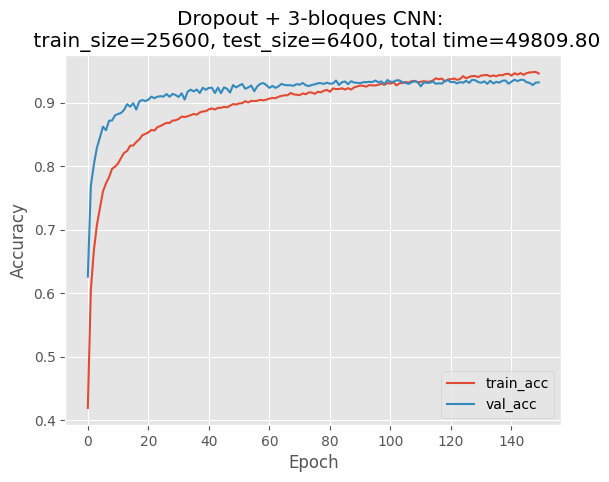

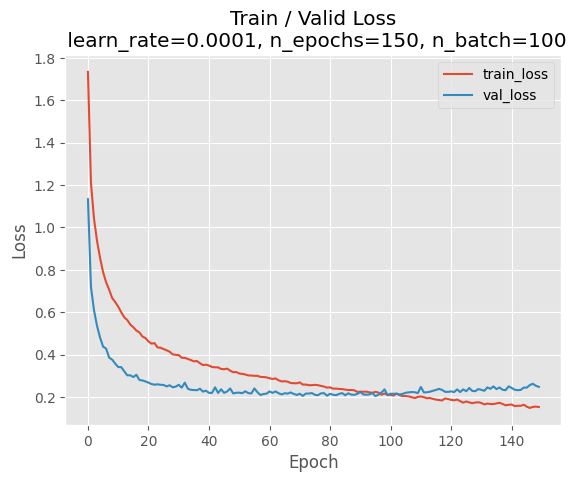

In [25]:
# Gráficas del historial de entrenamiento y validación:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Dropout + 3-bloques CNN: \n train_size=" + str(train_size) + 
          ", test_size=" + str(test_size) + ", total time=" + str(ttff))      
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Train / Valid Loss\n learn_rate=" + str(lrate) + 
          ", n_epochs=" + str(n_epochs) + ", n_batch=" + str(n_batch))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

#plt.savefig('plot06.png')

In [14]:
# Etiquetas de las categorías de imágenes
labels = ["Camiseta/Top", "Pantalón", "Suéter", "Vestido", "Abrigo", "Sandalia", "Camisa", "Zapatilla deportiva", "Bolso", "Bota de tobillo"]

# estadísticas de desempeño de la red
predictions = model.predict(x_validation, batch_size=n_batch)
print(classification_report(y_validation.argmax(axis=1), 
      predictions.argmax(axis=1),target_names=labels))

64/64 [==============================] - 5s 62ms/step
                     precision    recall  f1-score   support

       Camiseta/Top       0.91      0.86      0.88       688
           Pantalón       0.99      0.98      0.99       680
             Suéter       0.94      0.88      0.91       626
            Vestido       0.92      0.94      0.93       668
             Abrigo       0.87      0.90      0.88       576
           Sandalia       0.99      0.99      0.99       586
             Camisa       0.78      0.85      0.81       643
Zapatilla deportiva       0.96      0.98      0.97       642
              Bolso       0.99      0.98      0.99       643
    Bota de tobillo       0.98      0.97      0.98       648

           accuracy                           0.93      6400
          macro avg       0.93      0.93      0.93      6400
       weighted avg       0.93      0.93      0.93      6400



In [27]:
classification_report_dict = classification_report(y_validation.argmax(axis=1), predictions.argmax(axis=1), target_names=labels, output_dict=True)

# Convierte el diccionario en un DataFrame
df_classification_report = pd.DataFrame(classification_report_dict).transpose()

# Si deseas guardar el DataFrame en un archivo CSV
df_classification_report.to_csv('classification_report.csv')

# Imprime el DataFrame
print(df_classification_report)

                     precision    recall  f1-score      support
Camiseta/Top          0.907550  0.856105  0.881077   688.000000
Pantalón              0.991098  0.982353  0.986706   680.000000
Suéter                0.943299  0.876997  0.908940   626.000000
Vestido               0.924556  0.935629  0.930060   668.000000
Abrigo                0.866667  0.902778  0.884354   576.000000
Sandalia              0.989744  0.988055  0.988898   586.000000
Camisa                0.776204  0.852255  0.812454   643.000000
Zapatilla deportiva   0.964561  0.975078  0.969791   642.000000
Bolso                 0.990581  0.981337  0.985938   643.000000
Bota de tobillo       0.979751  0.970679  0.975194   648.000000
accuracy              0.931875  0.931875  0.931875     0.931875
macro avg             0.933401  0.932126  0.932341  6400.000000
weighted avg          0.933720  0.931875  0.932374  6400.000000


In [15]:
# Matriz de confusión
confusion_matrix(y_validation.argmax(axis=1), predictions.argmax(axis=1))

array([[589,   0,   9,  11,   3,   0,  74,   0,   2,   0],
       [  0, 668,   0,   9,   1,   0,   2,   0,   0,   0],
       [  8,   0, 549,   3,  35,   0,  31,   0,   0,   0],
       [ 10,   5,   2, 625,  14,   0,  12,   0,   0,   0],
       [  0,   0,   8,  14, 520,   0,  33,   0,   1,   0],
       [  0,   0,   0,   0,   0, 579,   0,   5,   0,   2],
       [ 41,   1,  13,  12,  26,   0, 548,   0,   2,   0],
       [  0,   0,   0,   0,   0,   5,   0, 626,   0,  11],
       [  1,   0,   1,   2,   1,   0,   6,   1, 631,   0],
       [  0,   0,   0,   0,   0,   1,   0,  17,   1, 629]])

In [31]:
# Arquitectura de la red
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      